# Project: Image Classification

In [6]:
## Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist

In [7]:
#Load MNIST and Fashion MNIST Data

# Load MNIST data
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

# Load Fashion MNIST data
(X_train_fmnist, y_train_fmnist), (X_test_fmnist, y_test_fmnist) = fashion_mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Data Analysis

In [8]:
# MNIST Dataset Analysis
print("MNIST Train Data Shape:", X_train_mnist.shape)
print("MNIST Test Data Shape:", X_test_mnist.shape)
print("MNIST Train Labels Shape:", y_train_mnist.shape)
print("MNIST Test Labels Shape:", y_test_mnist.shape)


MNIST Train Data Shape: (60000, 28, 28)
MNIST Test Data Shape: (10000, 28, 28)
MNIST Train Labels Shape: (60000,)
MNIST Test Labels Shape: (10000,)


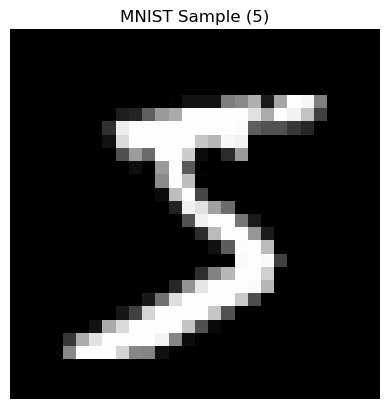

In [9]:
#View Data

# Select a random sample from the training data
sample_index = 0  # Change this to view different samples
sample_image = X_train_mnist[sample_index]
sample_label = y_train_mnist[sample_index]

# Display the sample image
plt.imshow(sample_image, cmap='gray')
plt.title(f'MNIST Sample ({sample_label})')
plt.axis('off')
plt.show()

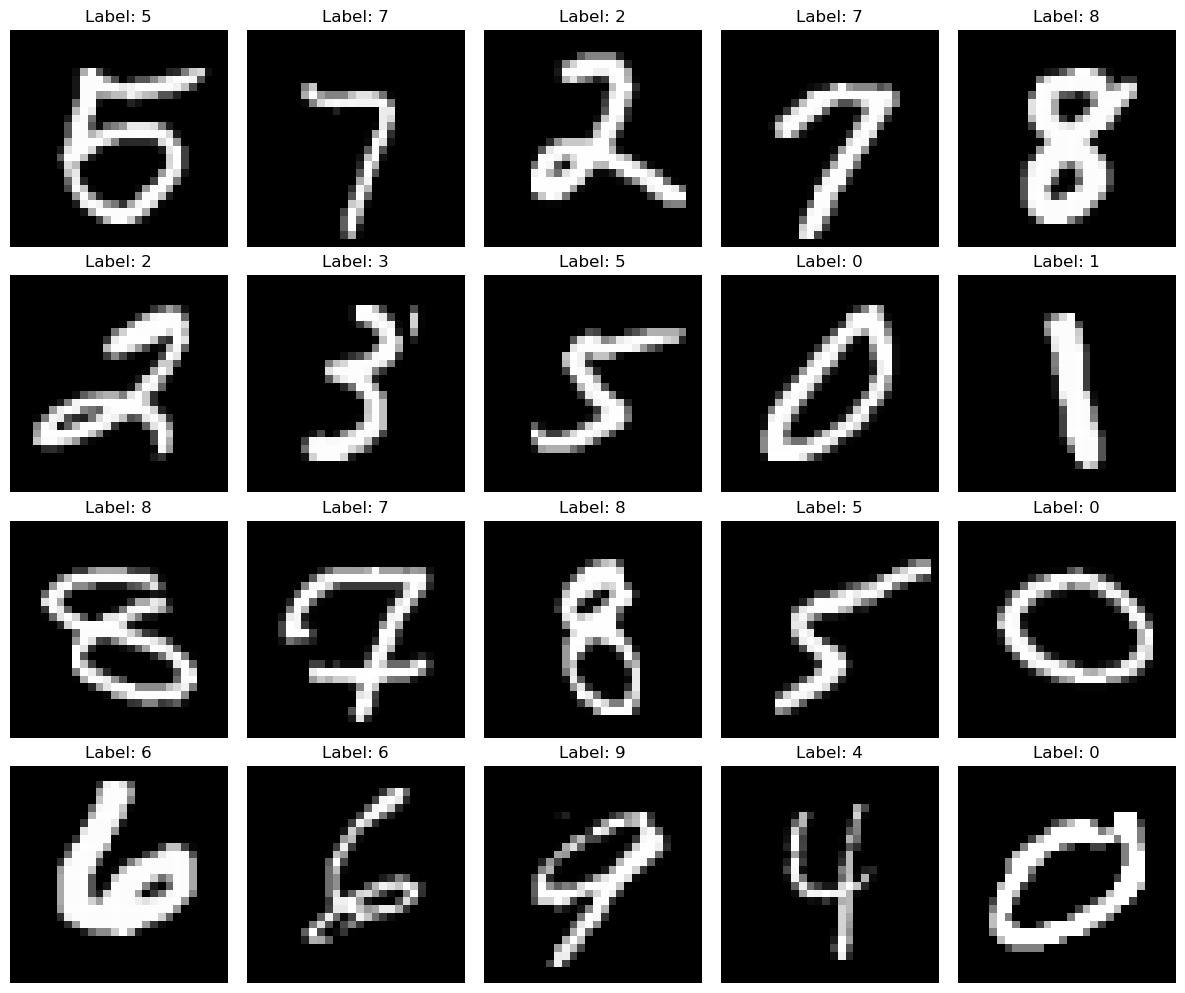

In [10]:
# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 5
num_samples = num_rows * num_cols

# Randomly select samples
random_indices = np.random.choice(len(X_train_mnist), size=num_samples, replace=False)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axes array
axes = axes.flatten()

# Display samples
for i, index in enumerate(random_indices):
    sample_image = X_train_mnist[index]
    sample_label = y_train_mnist[index]
    
    axes[i].imshow(sample_image, cmap='gray')
    axes[i].set_title(f'Label: {sample_label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Feature Analysis
## 
MNIST Dataset Feature Analysis

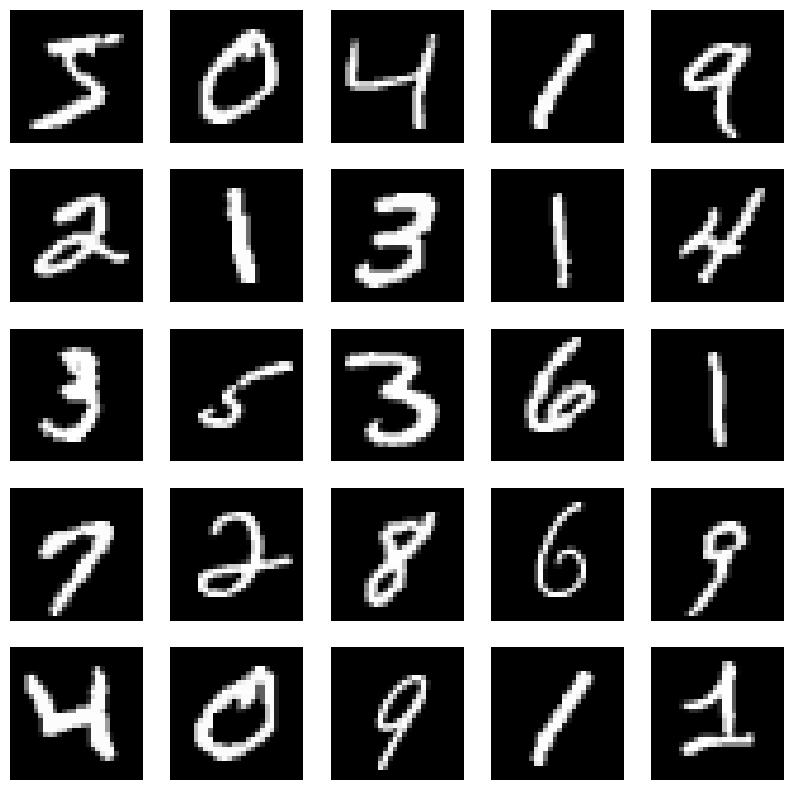

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train_mnist[i], cmap='gray')
    plt.axis('off')
plt.show()


## Visualize Dataset

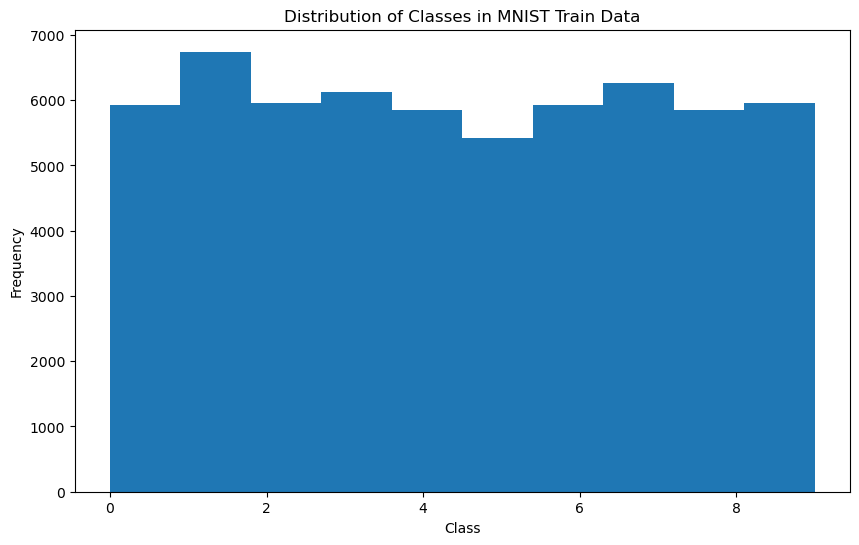

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(y_train_mnist, bins=10)
plt.title('Distribution of Classes in MNIST Train Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


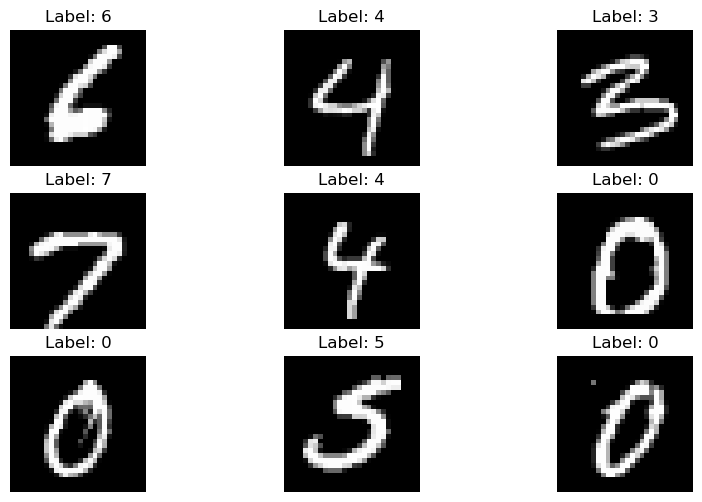

In [13]:
plt.figure(figsize=(10, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    random_index = np.random.randint(0, len(X_train_mnist))
    plt.imshow(X_train_mnist[random_index], cmap='gray')
    plt.title(f'Label: {y_train_mnist[random_index]}')
    plt.axis('off')
plt.show()


## Apply ML Models

In [14]:
# Flatten the images
X_train_mnist_flat = X_train_mnist.reshape(X_train_mnist.shape[0], -1)
X_test_mnist_flat = X_test_mnist.reshape(X_test_mnist.shape[0], -1)

# Normalize the pixel values
X_train_mnist_flat = X_train_mnist_flat.astype('float32') / 255
X_test_mnist_flat = X_test_mnist_flat.astype('float32') / 255

In [15]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_mnist_flat, y_train_mnist)
svm_pred = svm_model.predict(X_test_mnist_flat)
svm_accuracy = accuracy_score(y_test_mnist, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9404


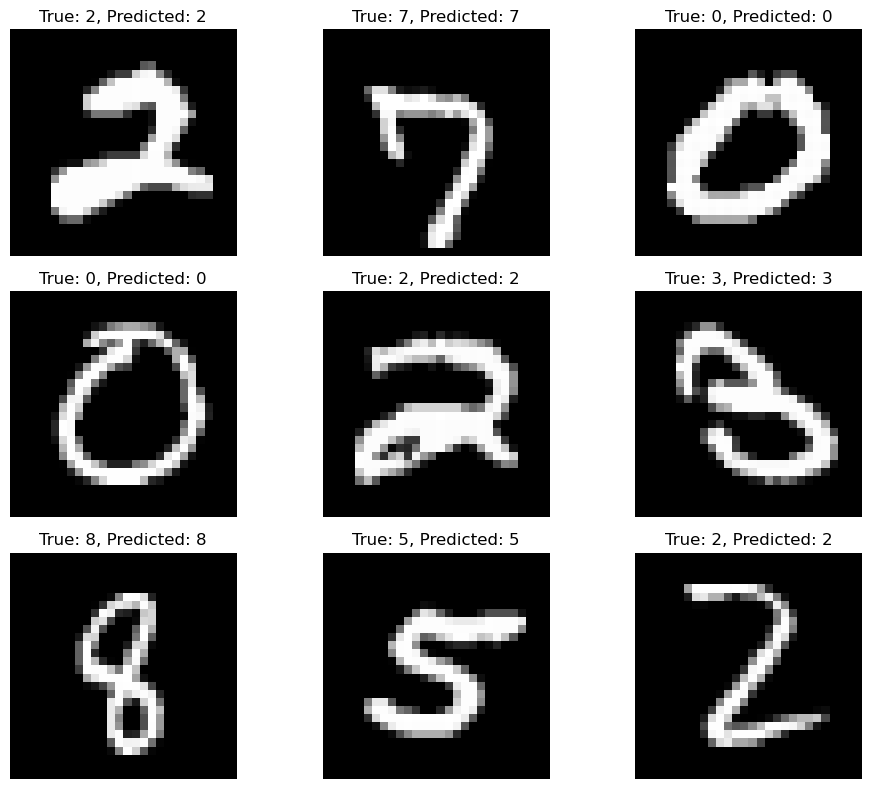

In [16]:
# Make predictions on the test set
svm_pred = svm_model.predict(X_test_mnist_flat)

# Visualize a few random samples with predictions
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    index = np.random.randint(0, len(X_test_mnist))
    plt.imshow(X_test_mnist[index], cmap='gray')
    plt.title(f"True: {y_test_mnist[index]}, Predicted: {svm_pred[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_mnist_flat, y_train_mnist)
rf_pred = rf_model.predict(X_test_mnist_flat)
rf_accuracy = accuracy_score(y_test_mnist, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9706


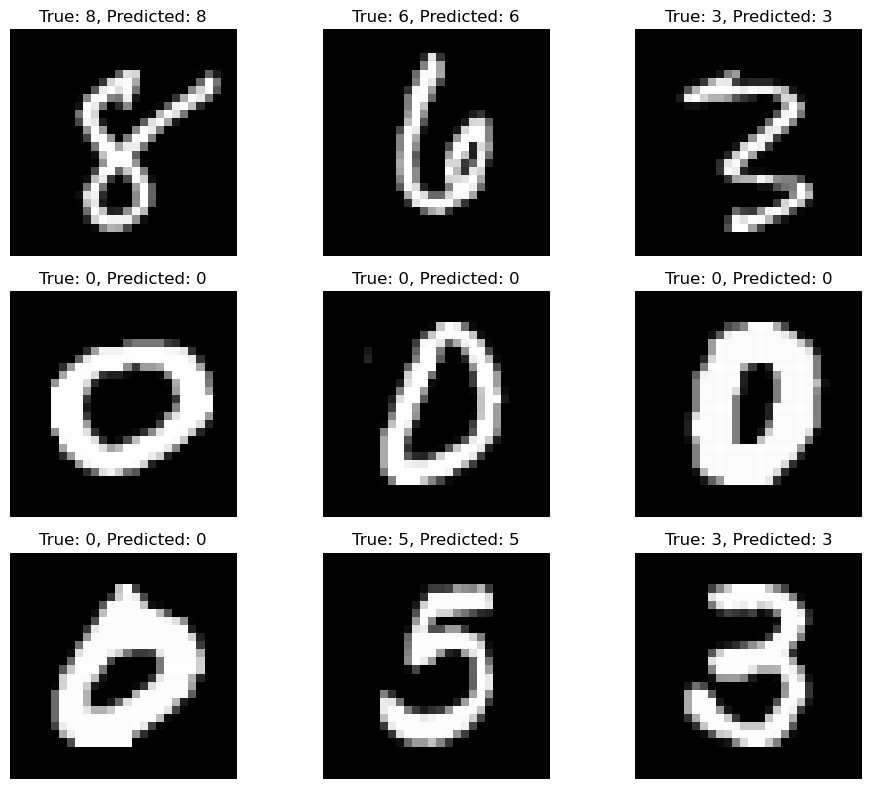

In [17]:
# Make predictions on the test set using the RandomForestClassifier
rf_pred = rf_model.predict(X_test_mnist_flat)

# Visualize a few random samples with predictions
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    index = np.random.randint(0, len(X_test_mnist))
    plt.imshow(X_test_mnist[index], cmap='gray')
    plt.title(f"True: {y_test_mnist[index]}, Predicted: {rf_pred[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Data Source

In [ ]:
# Load the downloaded MNIST test data
X_test_mnist = np.load('X_test_mnist.npy')
y_test_mnist = np.load('y_test_mnist.npy')

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Directory containing the downloaded MNIST test images in .jpg or .png format
test_images_dir = "path/to/test/images/directory"

# Load and preprocess test images
X_test_mnist = []
y_test_mnist = []

for filename in os.listdir(test_images_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(test_images_dir, filename)
        label = int(filename.split("_")[1])  # Assuming filename format: "image_label.jpg"
        
        # Read and preprocess the image
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))  # Resize to MNIST image size (28x28)
        img = img.astype('float32') / 255  # Normalize pixel values
        X_test_mnist.append(img)
        y_test_mnist.append(label)

# Convert lists to numpy arrays
X_test_mnist = np.array(X_test_mnist)
y_test_mnist = np.array(y_test_mnist)

# Flatten the images
X_test_mnist_flat = X_test_mnist.reshape(X_test_mnist.shape[0], -1)

# Make predictions on the test set using the trained RandomForestClassifier
rf_pred = rf_model.predict(X_test_mnist_flat)

# Visualize a few random samples with predictions
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    index = np.random.randint(0, len(X_test_mnist))
    plt.imshow(X_test_mnist[index], cmap='gray')
    plt.title(f"True: {y_test_mnist[index]}, Predicted: {rf_pred[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
